Name: **Zhenmin Hua**  
USC_ID: **5905057247**  
Github username: **Zeddhua2077**

# 552_hw4

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import numpy as np
import pandas as pd
import os
import math
from scipy import stats
from sklearn.utils import resample  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE

## Q2.a

### Q2.a.i

Important features: **mean**, **median**, **std**

In [25]:
# df
# df_train
# df_test

def get_features(df1):    
    df1_des = df1.describe()
    df1_des.drop(['# Columns: time'], axis=1, inplace=True)
    df1_des.drop(['count'], axis=0, inplace=True)
    df1_des = df1_des.reindex(index=['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    df1_des.columns = [1, 2, 3, 4, 5, 6]
    df = pd.DataFrame()
    for i in range(1,7):
        df_T = pd.DataFrame(df1_des[i]).T.reset_index(drop=True)
        df_T = df_T.add_suffix('_'+str(i))
        df = pd.concat([df, df_T], axis=1)
    return df

df = pd.DataFrame()
df_test = pd.DataFrame()
df_train = pd.DataFrame()
fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
for name in fold_name:
    num = 1
    path = '../data/AReM/' + name + '/dataset1.csv'
    while(os.path.exists(path)):
        if name == 'bending2' and num == 4:
            df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
            df1.drop([7], axis=1, inplace=True)
            df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
        else:
            df1 = pd.read_csv(path, sep=',', skiprows=4)
        features = get_features(df1)
        features['type'] = name
        df = df.append(features) 
        if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
            features = get_features(df1)
            features['type'] = name
            df_test = df_test.append(features)
        elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
            features = get_features(df1)
            features['type'] = name
            df_test = df_test.append(features)
        else:
            features = get_features(df1)
            features['type'] = name
            df_train = df_train.append(features)
        num += 1
        path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

df = df.reset_index(drop=True)
df.insert(0, 'Instance', range(1,len(df)+1))
#df.to_csv('time_features_labeled.csv', index=False)

def func(s):
    if 'bending' in s:
        return 'bending'
    else:
        return 'other'
    
df_train.type = df_train.type.map(func)

df_i = df_train[['mean_1', 'mean_2', 'mean_6', '50%_1', '50%_2', '50%_6', 'std_1', 'std_2', 'std_6', 'type']]
df_i = df_i.reset_index(drop=True)

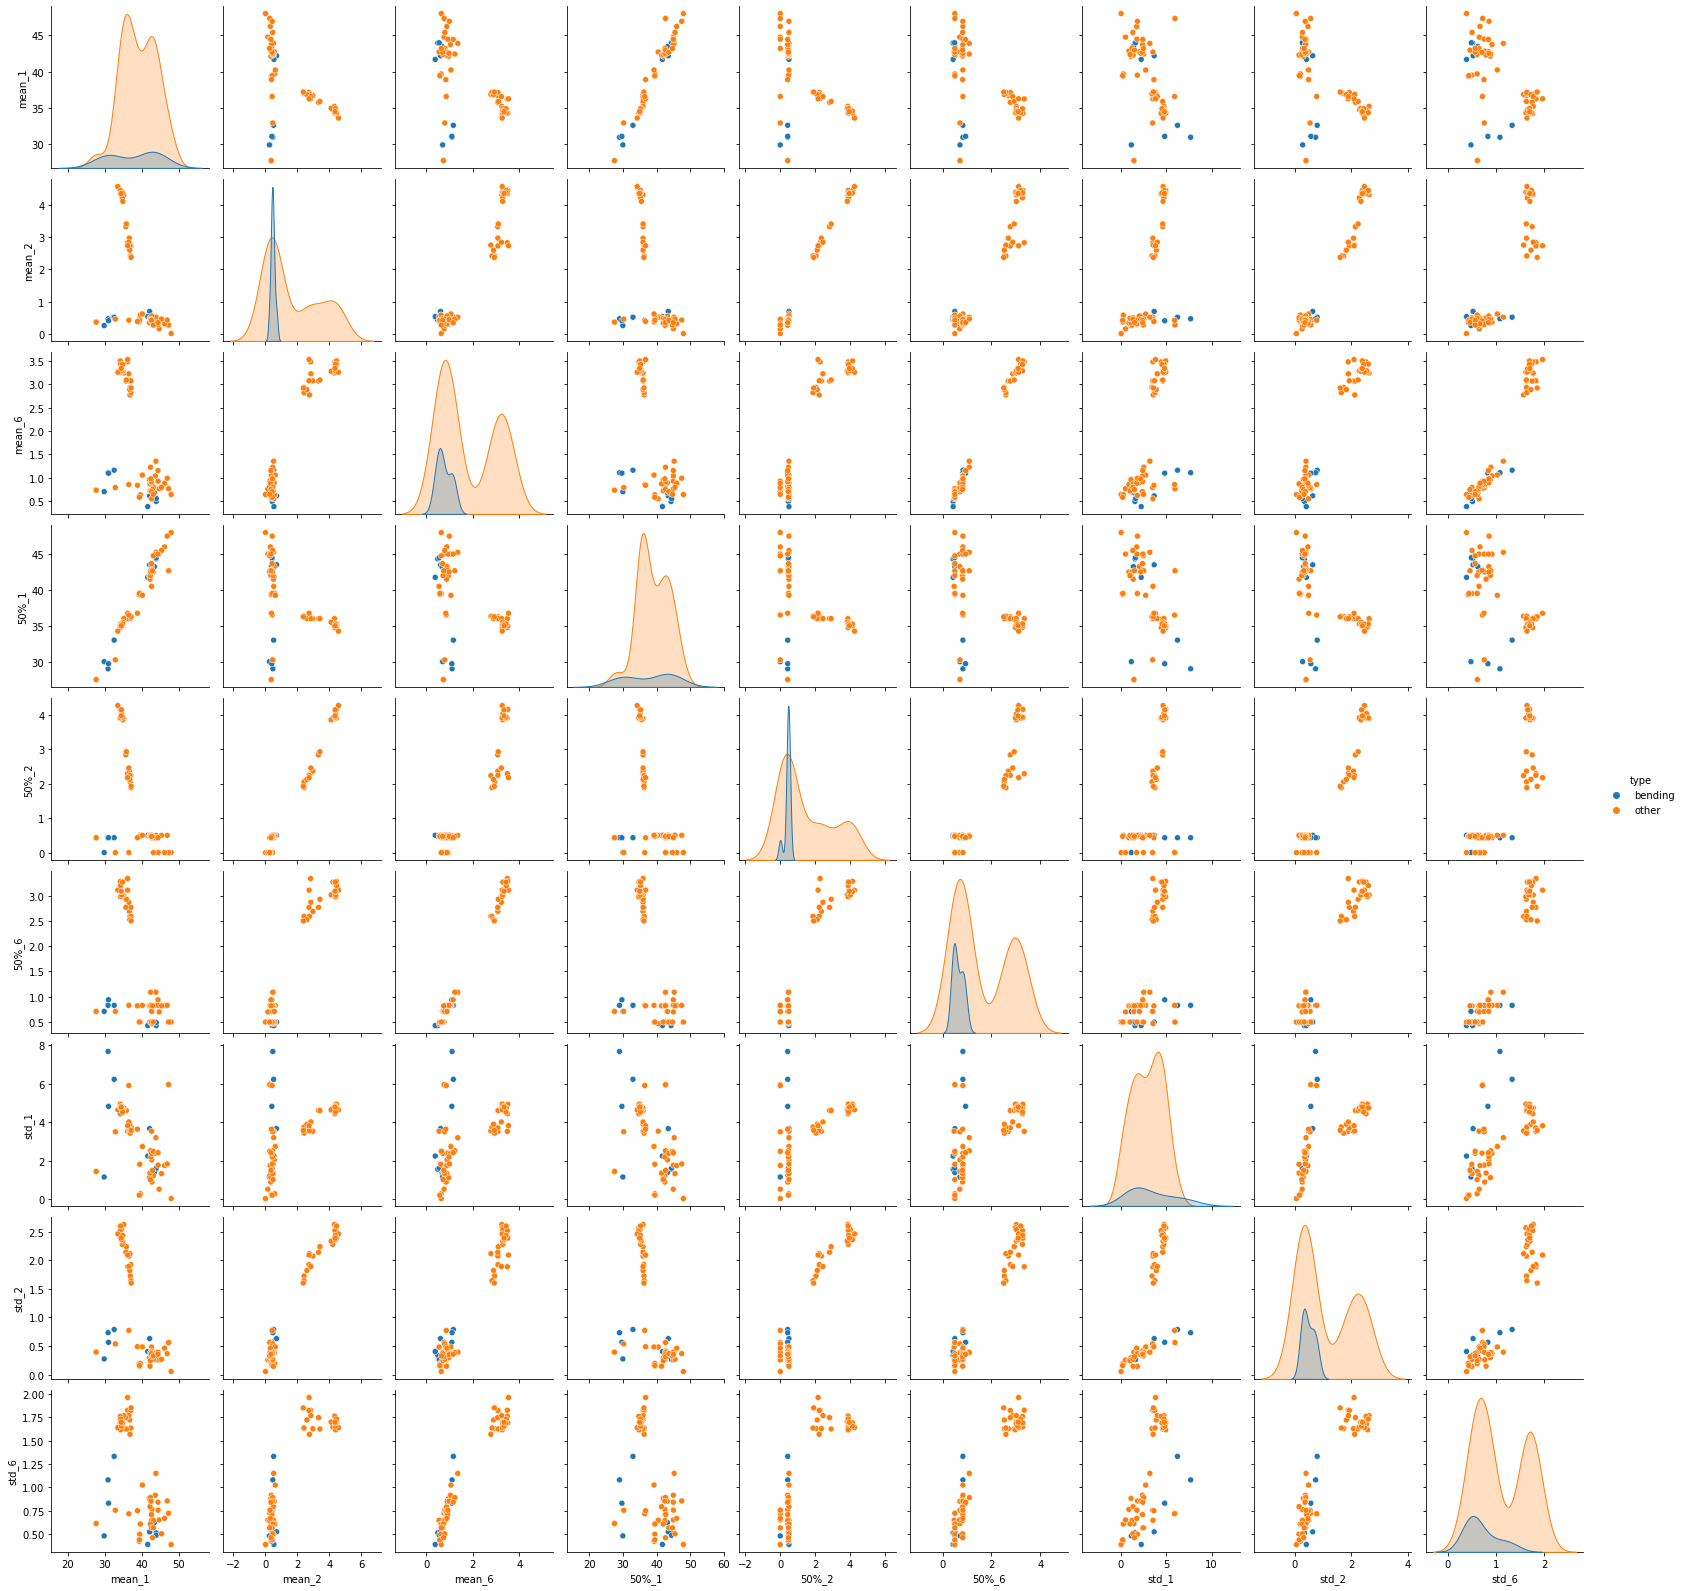

In [26]:
sns.pairplot(data=df_i, hue='type')

### Q2.a.ii

In [27]:
def break_df(df):
    rows = df.shape[0]
    df_new = pd.concat([df.iloc[:math.ceil(rows/2)].reset_index(drop=True), df.iloc[math.ceil(rows/2):].reset_index(drop=True)], axis=1)
    return df_new

def get_features(df1):
    df1 = break_df(df1)
    df1_des = df1.describe()
    df1_des.drop(['# Columns: time'], axis=1, inplace=True)
    df1_des.drop(['count'], axis=0, inplace=True)
    df1_des = df1_des.reindex(index=['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    df1_des.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    df = pd.DataFrame()
    for i in range(1,13):
        df_T = pd.DataFrame(df1_des[i]).T.reset_index(drop=True)
        df_T = df_T.add_suffix('_'+str(i))
        df = pd.concat([df, df_T], axis=1)
    return df

df = pd.DataFrame()
df_test = pd.DataFrame()
df_train = pd.DataFrame()
fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
for name in fold_name:
    num = 1
    path = '../data/AReM/' + name + '/dataset1.csv'
    while(os.path.exists(path)):
        if name == 'bending2' and num == 4:
            df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
            df1.drop([7], axis=1, inplace=True)
            df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
        else:
            df1 = pd.read_csv(path, sep=',', skiprows=4)
        features = get_features(df1)
        features['type'] = name
        df = df.append(features) 
        if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
            features = get_features(df1)
            features['type'] = name
            df_test = df_test.append(features)
        elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
            features = get_features(df1)
            features['type'] = name
            df_test = df_test.append(features)
        else:
            features = get_features(df1)
            features['type'] = name
            df_train = df_train.append(features)
        num += 1
        path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

df = df.reset_index(drop=True)
df.insert(0, 'Instance', range(1,len(df)+1))
#df.to_csv('time_features_labeled.csv', index=False)

def func(s):
    if 'bending' in s:
        return 'bending'
    else:
        return 'other'
    
df_train.type = df_train.type.map(func)

df_i = df_train[['mean_1', 'mean_2', 'mean_6', '50%_1', '50%_2', '50%_6', 'std_1', 'std_2', 'std_6', 'mean_7', 'mean_8', 'mean_12', '50%_7', '50%_8', '50%_12', 'std_7', 'std_8', 'std_12', 'type']]
df_i = df_i.reset_index(drop=True)

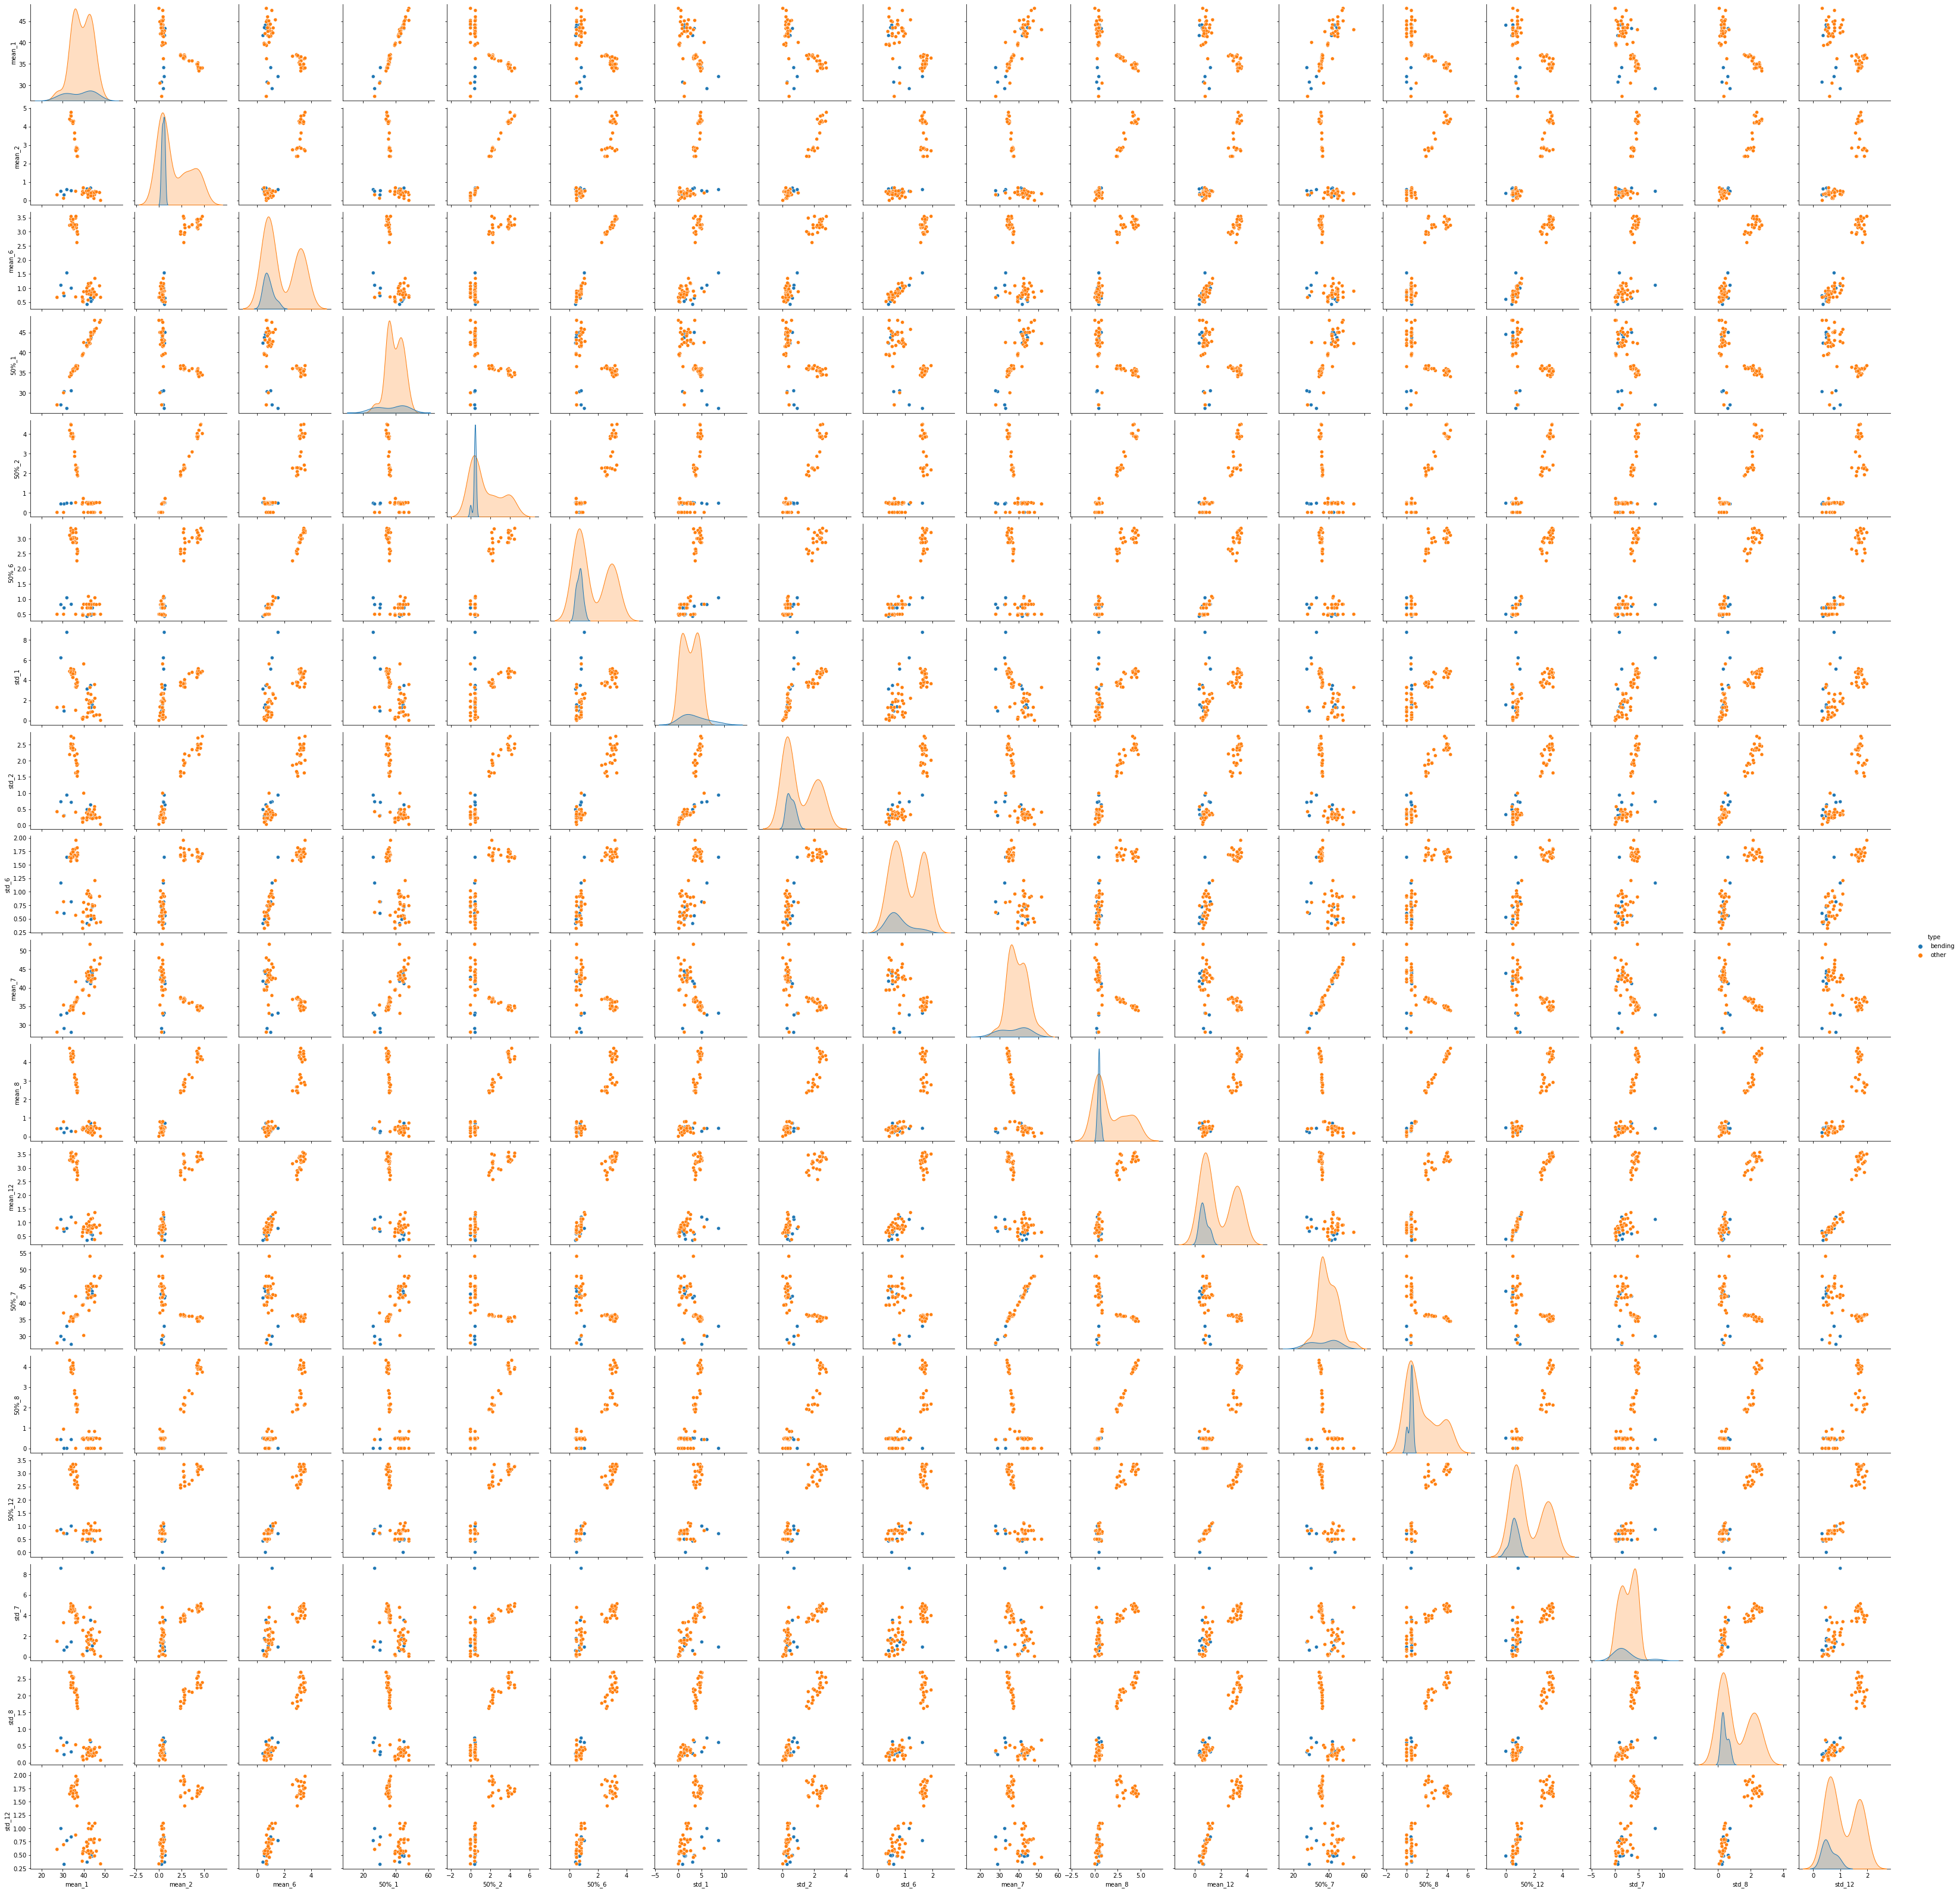

In [28]:
sns.pairplot(data=df_i, hue='type')

### Q2.a.iii

In [29]:
def break_df(df, l):
    rows = df.shape[0]
    num = math.ceil(rows/l)
    df_new = pd.DataFrame()
    for i in range(0, rows, num):
        start, end = i, i+num
        if end >= rows:
            df_new = pd.concat([df_new, df.iloc[start:].reset_index(drop=True)], axis=1)
        else:
            df_new = pd.concat([df_new, df.iloc[start: end].reset_index(drop=True)], axis=1)
    return df_new

def get_features(df1, l):
    df1 = break_df(df1, l)
    df1_des = df1.describe()
    df1_des.drop(['# Columns: time'], axis=1, inplace=True)
    df1_des.drop(['count'], axis=0, inplace=True)
    df1_des = df1_des.reindex(index=['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    df1_des.columns = [i for i in range(1,6*l+1)]
    df = pd.DataFrame()
    for i in range(1,6*l+1):
        df_T = pd.DataFrame(df1_des[i]).T.reset_index(drop=True)
        df_T = df_T.add_suffix('_'+str(i))
        df = pd.concat([df, df_T], axis=1)
    return df

def func(s):
    if 'bending' in s:
        return 'bending'
    else:
        return 'other'

model_lst = []
for l in range(1,21):
    df = pd.DataFrame()
    df_test = pd.DataFrame()
    df_train = pd.DataFrame()
    fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
    for name in fold_name:
        num = 1
        path = '../data/AReM/' + name + '/dataset1.csv'
        while(os.path.exists(path)):
            if name == 'bending2' and num == 4:
                df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
                df1.drop([7], axis=1, inplace=True)
                df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
            else:
                df1 = pd.read_csv(path, sep=',', skiprows=4)
            features = get_features(df1, l)
            features['type'] = name
            df = df.append(features) 
            if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
                features = get_features(df1, l)
                features['type'] = name
                df_test = df_test.append(features)
            elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
                features = get_features(df1, l)
                features['type'] = name
                df_test = df_test.append(features)
            else:
                features = get_features(df1, l)
                features['type'] = name
                df_train = df_train.append(features)
            num += 1
            path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

    df = df.reset_index(drop=True)
    df.insert(0, 'Instance', range(1,len(df)+1))

    df_train.type = df_train.type.map(func)
    col = list(df_train.columns)
    new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
    x_train = df_train[new_col]
    y_train = df_train.type
    
    strKFold = StratifiedKFold(n_splits=5, shuffle=False)
    selector = RFECV(estimator=LogisticRegression(penalty='none'), cv=strKFold)    
    selector.fit(x_train, y_train)
    model_lst.append((max(selector.cv_results_['mean_test_score']), selector.n_features_, l))

model_lst.sort(key=lambda x: (-x[0], x[2]))
best_accuracy = model_lst[0][0]
best_p = model_lst[0][1]
best_l = model_lst[0][2]
print('Best_pair(l,p):', (best_l, best_p))
print('Best accuracy:', best_accuracy)

Best_pair(l,p): (10, 93)
Best accuracy: 0.9857142857142858


In [30]:
#selector.fit(x_train,y_train)
print("N_features %s" % selector.n_features_)
print("Support is %s" % selector.support_)
print("Ranking %s" % selector.ranking_)

N_features 126
Support is [False False  True  True False False False False  True  True  True False
 False False  True False  True False False  True  True  True  True  True
 False False  True False False False False False  True  True  True  True
  True  True  True False False  True False False  True  True False False
 False False  True False False False False False  True  True False False
 False  True  True  True False False False False  True  True  True  True
 False False  True  True  True  True False False  True  True  True  True
 False False  True False False False False False False False  True False
 False False False False  True False False False  True False  True  True
  True False  True  True False False  True  True False False False False
 False False  True  True False False False False  True  True  True False
  True  True  True  True False False  True  True  True  True  True False
  True  True  True  True False False  True  True  True False  True  True
  True  True  True  True 

### Q2.a.iv

confusion_matrix: 
 [[ 9  0]
 [ 0 60]]
Accuracy: 1.00000
Coefficients: [[ 0.13911365  0.1220263   0.12101778  0.11899406 -0.52916864 -0.49011272
   0.13301365  0.13369967  0.14365828  0.13058879  0.15233867  0.18723272
   0.11630691  0.12908097 -0.85722547 -0.89790487  0.14398904  0.14554444
   0.24835803  0.15709344  0.13953596  0.1042832   0.11351855 -0.59152347
  -0.46847749  0.15161929  0.13673392 -0.1979211  -0.28844436  0.15896497
   0.1257365   0.27972092  0.2392397   0.11446364 -0.25904562 -0.25920406
   0.17181809  0.15276515  0.14407875  0.12990675  0.12915173  0.13521276
   0.13825725  0.12939924  0.31994631  0.50610216  0.19034727  0.17221112
   0.12904953  0.12465692 -0.36790353 -0.38914291  0.14020915  0.12970167
   0.46773144  0.4503641   0.19529462  0.16326363 -0.26485491 -0.28512838
   0.17368851  0.14890552  0.15508919  0.14095862  0.40620792  0.35624279
   0.20472029  0.17421042 -0.13681083  0.17149706  0.17455928  0.15829887
   0.14136511  0.15057855  0.13592058  0.

<Figure size 432x288 with 0 Axes>

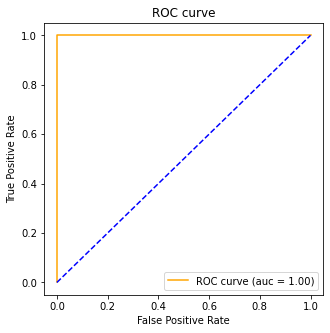

In [31]:
l = best_l
df = pd.DataFrame()
df_test = pd.DataFrame()
df_train = pd.DataFrame()
fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
for name in fold_name:
    num = 1
    path = '../data/AReM/' + name + '/dataset1.csv'
    while(os.path.exists(path)):
        if name == 'bending2' and num == 4:
            df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
            df1.drop([7], axis=1, inplace=True)
            df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
        else:
            df1 = pd.read_csv(path, sep=',', skiprows=4)
        features = get_features(df1, l)
        features['type'] = name
        df = df.append(features) 
        if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
            features = get_features(df1, l)
            features['type'] = name
            df_test = df_test.append(features)
        elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
            features = get_features(df1, l)
            features['type'] = name
            df_test = df_test.append(features)
        else:
            features = get_features(df1, l)
            features['type'] = name
            df_train = df_train.append(features)
        num += 1
        path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

df = df.reset_index(drop=True)
df.insert(0, 'Instance', range(1,len(df)+1))

df_train.type = df_train.type.map(func)
col = list(df_train.columns)
new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
x_train = df_train[new_col]
y_train = df_train.type

strKFold = StratifiedKFold(n_splits=5, shuffle=False)
selector = RFECV(estimator=LogisticRegression(penalty='none'), cv=strKFold)    
x_train_t = selector.fit_transform(x_train, y_train)

lr_t = LogisticRegression(penalty='none')
lr_t.fit(x_train_t, y_train)

y_pred = lr_t.predict(x_train_t)
y_score = lr_t.decision_function(x_train_t)

print('confusion_matrix:', '\n', confusion_matrix(y_train, y_pred))
print ('Accuracy: %.5f' % accuracy_score(y_train, y_pred))
print('Coefficients:', lr_t.coef_)
print('Intercept:', lr_t.intercept_)

# ROC AUC
fpr, tpr, thresholds = roc_curve(y_train, y_score, pos_label='other')
roc_auc = auc(fpr, tpr)
plt.figure()
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='orange', label='ROC curve (auc = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
lr_t.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'none',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Q2.a.v

 Test the classifier on the test set.

In [33]:
col = list(df_test.columns)
new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
new_col_selected = [new_col[i] for i in range(len(selector.support_)) if list(selector.support_)[i]]
df_test.type = df_test.type.map(func)

x_test = df_test[new_col_selected]
y_test = df_test.type

# model = lr_t
accuracy = lr_t.score(x_test, y_test)
print('Accuracy(test set):', accuracy)
print('Previous accuracy based on cross validation(train set):', best_accuracy)

Accuracy(test set): 1.0
Previous accuracy based on cross validation(train set): 0.9857142857142858


**Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.** 
- The accuracy on test set is smaller than that on train set. Maybe there's a slight overfitting problem in the train set.

### Q2.a.vi

Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

**Answer:**  
No. The classes are imbalanced. Therefore, the parameters calculated on the imbalanced classes are quite instable and unreliable.

### Q2.a.vii

From the confusion matrices you obtained, do you see imbalanced classes?  
If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model

**Answer:**  
Yes. I can see that the classes are imbalanced.

In [34]:
print('confusion_matrix:', '\n', confusion_matrix(y_train, y_pred))

confusion_matrix: 
 [[ 9  0]
 [ 0 60]]


In [35]:
y_train.value_counts()

other      60
bending     9
Name: type, dtype: int64

In [36]:
# smote

def break_df(df, l):
    rows = df.shape[0]
    num = math.ceil(rows/l)
    df_new = pd.DataFrame()
    for i in range(0, rows, num):
        start, end = i, i+num
        if end >= rows:
            df_new = pd.concat([df_new, df.iloc[start:].reset_index(drop=True)], axis=1)
        else:
            df_new = pd.concat([df_new, df.iloc[start: end].reset_index(drop=True)], axis=1)
    return df_new

def get_features(df1, l):
    df1 = break_df(df1, l)
    df1_des = df1.describe()
    df1_des.drop(['# Columns: time'], axis=1, inplace=True)
    df1_des.drop(['count'], axis=0, inplace=True)
    df1_des = df1_des.reindex(index=['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    df1_des.columns = [i for i in range(1,6*l+1)]
    df = pd.DataFrame()
    for i in range(1,6*l+1):
        df_T = pd.DataFrame(df1_des[i]).T.reset_index(drop=True)
        df_T = df_T.add_suffix('_'+str(i))
        df = pd.concat([df, df_T], axis=1)
    return df

def func(s):
    if 'bending' in s:
        return 'bending'
    else:
        return 'other'

model_lst = []
for l in range(1,21):
    df = pd.DataFrame()
    df_test = pd.DataFrame()
    df_train = pd.DataFrame()
    fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
    for name in fold_name:
        num = 1
        path = '../data/AReM/' + name + '/dataset1.csv'
        while(os.path.exists(path)):
            if name == 'bending2' and num == 4:
                df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
                df1.drop([7], axis=1, inplace=True)
                df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
            else:
                df1 = pd.read_csv(path, sep=',', skiprows=4)
            features = get_features(df1, l)
            features['type'] = name
            df = df.append(features) 
            if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
                features = get_features(df1, l)
                features['type'] = name
                df_test = df_test.append(features)
            elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
                features = get_features(df1, l)
                features['type'] = name
                df_test = df_test.append(features)
            else:
                features = get_features(df1, l)
                features['type'] = name
                df_train = df_train.append(features)
            num += 1
            path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

    df = df.reset_index(drop=True)
    df.insert(0, 'Instance', range(1,len(df)+1))

    df_train.type = df_train.type.map(func)
    col = list(df_train.columns)
    new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
    x_train = df_train[new_col]
    y_train = df_train.type
    x_train, y_train = SMOTE().fit_resample(x_train, y_train)
    
    strKFold = StratifiedKFold(n_splits=5, shuffle=False)
    selector = RFECV(estimator=LogisticRegression(penalty='none'), cv=strKFold)    
    selector.fit(x_train, y_train)
    model_lst.append((max(selector.cv_results_['mean_test_score']), selector.n_features_, l))

model_lst.sort(key=lambda x: (-x[0], x[2]))
best_accuracy = model_lst[0][0]
best_p = model_lst[0][1]
best_l = model_lst[0][2]
print('Best_pair(l,p):', (best_l, best_p))
print('Best accuracy:', best_accuracy)

Best_pair(l,p): (11, 3)
Best accuracy: 1.0


confusion_matrix: 
 [[60  0]
 [ 0 60]]
Accuracy: 1.00000
Coefficients: [[-19.21546049 -10.97392272]]
Intercept: [591.37507842]


<Figure size 432x288 with 0 Axes>

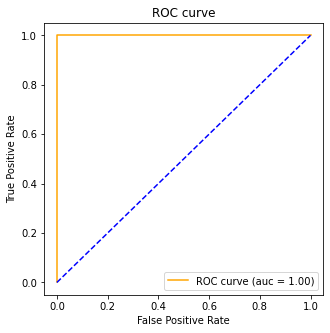

In [37]:
l = best_l
df = pd.DataFrame()
df_test = pd.DataFrame()
df_train = pd.DataFrame()
fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
for name in fold_name:
    num = 1
    path = '../data/AReM/' + name + '/dataset1.csv'
    while(os.path.exists(path)):
        if name == 'bending2' and num == 4:
            df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
            df1.drop([7], axis=1, inplace=True)
            df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
        else:
            df1 = pd.read_csv(path, sep=',', skiprows=4)
        features = get_features(df1, l)
        features['type'] = name
        df = df.append(features) 
        if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
            features = get_features(df1, l)
            features['type'] = name
            df_test = df_test.append(features)
        elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
            features = get_features(df1, l)
            features['type'] = name
            df_test = df_test.append(features)
        else:
            features = get_features(df1, l)
            features['type'] = name
            df_train = df_train.append(features)
        num += 1
        path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

df = df.reset_index(drop=True)
df.insert(0, 'Instance', range(1,len(df)+1))

df_train.type = df_train.type.map(func)
col = list(df_train.columns)
new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
x_train = df_train[new_col]
y_train = df_train.type
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

strKFold = StratifiedKFold(n_splits=5, shuffle=False)
selector = RFECV(estimator=LogisticRegression(penalty='none'), cv=strKFold)    
x_train_t = selector.fit_transform(x_train, y_train)

lr_t = LogisticRegression(penalty='none')
lr_t.fit(x_train_t, y_train)

y_pred = lr_t.predict(x_train_t)
y_score = lr_t.decision_function(x_train_t)

print('confusion_matrix:', '\n', confusion_matrix(y_train, y_pred))
print ('Accuracy: %.5f' % accuracy_score(y_train, y_pred))
print('Coefficients:', lr_t.coef_)
print('Intercept:', lr_t.intercept_)

# ROC AUC
fpr, tpr, thresholds = roc_curve(y_train, y_score, pos_label='other')
roc_auc = auc(fpr, tpr)
plt.figure()
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='orange', label='ROC curve (auc = %0.2f)' % roc_auc) 
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [38]:
col = list(df_test.columns)
new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
new_col_selected = [new_col[i] for i in range(len(selector.support_)) if list(selector.support_)[i]]
df_test.type = df_test.type.map(func)

x_test = df_test[new_col_selected]
y_test = df_test.type

# model = lr_t
accuracy = lr_t.score(x_test, y_test)
print('Accuracy(test set):', accuracy)
print('Previous accuracy based on cross validation(train set):', best_accuracy)

Accuracy(test set): 0.8947368421052632
Previous accuracy based on cross validation(train set): 1.0


## Q2.b 
Binary Classification Using L1-penalized logistic regression

### Q2.b.i

In [39]:
# Binary Classification Using L1-penalized logistic regression

def break_df(df, l):
    rows = df.shape[0]
    num = math.ceil(rows/l)
    df_new = pd.DataFrame()
    for i in range(0, rows, num):
        start, end = i, i+num
        if end >= rows:
            df_new = pd.concat([df_new, df.iloc[start:].reset_index(drop=True)], axis=1)
        else:
            df_new = pd.concat([df_new, df.iloc[start: end].reset_index(drop=True)], axis=1)
    return df_new

def get_features(df1, l):
    df1 = break_df(df1, l)
    df1_des = df1.describe()
    df1_des.drop(['# Columns: time'], axis=1, inplace=True)
    df1_des.drop(['count'], axis=0, inplace=True)
    df1_des = df1_des.reindex(index=['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    df1_des.columns = [i for i in range(1,6*l+1)]
    df = pd.DataFrame()
    for i in range(1,6*l+1):
        df_T = pd.DataFrame(df1_des[i]).T.reset_index(drop=True)
        df_T = df_T.add_suffix('_'+str(i))
        df = pd.concat([df, df_T], axis=1)
    return df

def func(s):
    if 'bending' in s:
        return 'bending'
    else:
        return 'other'

model_lst = []
for l in range(1,21):
    df = pd.DataFrame()
    df_test = pd.DataFrame()
    df_train = pd.DataFrame()
    fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
    for name in fold_name:
        num = 1
        path = '../data/AReM/' + name + '/dataset1.csv'
        while(os.path.exists(path)):
            if name == 'bending2' and num == 4:
                df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
                df1.drop([7], axis=1, inplace=True)
                df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
            else:
                df1 = pd.read_csv(path, sep=',', skiprows=4)
            features = get_features(df1, l)
            features['type'] = name
            df = df.append(features) 
            if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
                features = get_features(df1, l)
                features['type'] = name
                df_test = df_test.append(features)
            elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
                features = get_features(df1, l)
                features['type'] = name
                df_test = df_test.append(features)
            else:
                features = get_features(df1, l)
                features['type'] = name
                df_train = df_train.append(features)
            num += 1
            path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

    df = df.reset_index(drop=True)
    df.insert(0, 'Instance', range(1,len(df)+1))

    df_train.type = df_train.type.map(func)
    col = list(df_train.columns)
    new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
    x_train = df_train[new_col]
    x_train = StandardScaler().fit_transform(x_train)
    y_train = df_train.type
    
    strKFold = StratifiedKFold(n_splits=5, shuffle=False)
    lr_model = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=strKFold)
    lr_model.fit(x_train, y_train)
    model_lst.append((lr_model.scores_['other'].mean(axis=0).max(), lr_model.C_, l))

model_lst.sort(key=lambda x: (-x[0], x[2]))
best_accuracy = model_lst[0][0]
best_c = model_lst[0][1]
best_l = model_lst[0][2]
print('Best_pair(l,c):', (best_l, best_c))
print('Best accuracy:', best_accuracy)

Best_pair(l,c): (3, array([0.35938137]))
Best accuracy: 0.9714285714285715


In [40]:
lr_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0}

### Q2.b.ii

Compare the L1-penalized with variable selection using p-values.   
Which one performs better?   
Which one is easier to implement?

**Answer:**  
I use RFECV in a(iii), so I will compare L1-penalized with RFECV.
1. L1-penalized performs better. L1-penalized's best score is 0.9714, and RFECV's best score is 0.8947.
2. L1-penalized is easier to implement. Because L1-penalized's best_l is 3, and RFECV's best l is 5.

## Q2.c

### Q2.c.i

In [41]:
# L1-penalized multinomial regression model
def break_df(df, l):
    rows = df.shape[0]
    num = math.ceil(rows/l)
    df_new = pd.DataFrame()
    for i in range(0, rows, num):
        start, end = i, i+num
        if end >= rows:
            df_new = pd.concat([df_new, df.iloc[start:].reset_index(drop=True)], axis=1)
        else:
            df_new = pd.concat([df_new, df.iloc[start: end].reset_index(drop=True)], axis=1)
    return df_new

def get_features(df1, l):
    df1 = break_df(df1, l)
    df1_des = df1.describe()
    df1_des.drop(['# Columns: time'], axis=1, inplace=True)
    df1_des.drop(['count'], axis=0, inplace=True)
    df1_des = df1_des.reindex(index=['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    df1_des.columns = [i for i in range(1,6*l+1)]
    df = pd.DataFrame()
    for i in range(1,6*l+1):
        df_T = pd.DataFrame(df1_des[i]).T.reset_index(drop=True)
        df_T = df_T.add_suffix('_'+str(i))
        df = pd.concat([df, df_T], axis=1)
    return df

def func(s):
    if 'bending' in s:
        return 'bending'
    else:
        return 'other'

model_lst = []
for l in range(1,21):
    df = pd.DataFrame()
    df_test = pd.DataFrame()
    df_train = pd.DataFrame()
    fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
    for name in fold_name:
        num = 1
        path = '../data/AReM/' + name + '/dataset1.csv'
        while(os.path.exists(path)):
            if name == 'bending2' and num == 4:
                df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
                df1.drop([7], axis=1, inplace=True)
                df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
            else:
                df1 = pd.read_csv(path, sep=',', skiprows=4)
            features = get_features(df1, l)
            features['type'] = name
            df = df.append(features) 
            if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
                features = get_features(df1, l)
                features['type'] = name
                df_test = df_test.append(features)
            elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
                features = get_features(df1, l)
                features['type'] = name
                df_test = df_test.append(features)
            else:
                features = get_features(df1, l)
                features['type'] = name
                df_train = df_train.append(features)
            num += 1
            path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

    df = df.reset_index(drop=True)
    df.insert(0, 'Instance', range(1,len(df)+1))

    # df_train.type = df_train.type.map(func)
    col = list(df_train.columns)
    new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
    x_train = df_train[new_col]
    x_train = StandardScaler().fit_transform(x_train)
    y_train = df_train.type
    
    strKFold = StratifiedKFold(n_splits=5, shuffle=False)
    lr_model = LogisticRegressionCV(penalty='l1', solver='saga', cv=strKFold)   
    lr_model.fit(x_train, y_train)
    model_lst.append((lr_model.scores_['bending1'].mean(axis=0).max(), lr_model.C_, l))

model_lst.sort(key=lambda x: (-x[0], x[2]))
best_accuracy = model_lst[0][0]
best_c = model_lst[0][1]
best_l = model_lst[0][2]
print('Best_pair(l,c):', (best_l, best_c))
print('Best accuracy:', best_accuracy)

Best_pair(l,c): (1, array([21.5443469, 21.5443469, 21.5443469, 21.5443469, 21.5443469,
       21.5443469, 21.5443469]))
Best accuracy: 0.8681318681318683


In [42]:
#test_error
l = 1
c = 21.5443469
df = pd.DataFrame()
df_test = pd.DataFrame()
df_train = pd.DataFrame()
fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
for name in fold_name:
    num = 1
    path = '../data/AReM/' + name + '/dataset1.csv'
    while(os.path.exists(path)):
        if name == 'bending2' and num == 4:
            df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
            df1.drop([7], axis=1, inplace=True)
            df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
        else:
            df1 = pd.read_csv(path, sep=',', skiprows=4)
        features = get_features(df1, l)
        features['type'] = name
        df = df.append(features) 
        if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
            features = get_features(df1, l)
            features['type'] = name
            df_test = df_test.append(features)
        elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
            features = get_features(df1, l)
            features['type'] = name
            df_test = df_test.append(features)
        else:
            features = get_features(df1, l)
            features['type'] = name
            df_train = df_train.append(features)
        num += 1
        path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

df = df.reset_index(drop=True)
df.insert(0, 'Instance', range(1,len(df)+1))

# df_train.type = df_train.type.map(func)
col = list(df_train.columns)
new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
x_train = df_train[new_col]
x_train = StandardScaler().fit_transform(x_train)
y_train = df_train.type

x_test = df_test[new_col]
x_test = StandardScaler().fit_transform(x_test)
y_test = df_test.type

lr_model = LogisticRegression(C=c, penalty='l1', solver='saga')   
lr_model.fit(x_train, y_train)

test_error = 1 - lr_model.score(x_test, y_test)
print('test_error:', test_error)

test_error: 0.10526315789473684


### Q2.c.ii

In [43]:
# Naive Bayes’ classifier
# Gaussian
def break_df(df, l):
    rows = df.shape[0]
    num = math.ceil(rows/l)
    df_new = pd.DataFrame()
    for i in range(0, rows, num):
        start, end = i, i+num
        if end >= rows:
            df_new = pd.concat([df_new, df.iloc[start:].reset_index(drop=True)], axis=1)
        else:
            df_new = pd.concat([df_new, df.iloc[start: end].reset_index(drop=True)], axis=1)
    return df_new

def get_features(df1, l):
    df1 = break_df(df1, l)
    df1_des = df1.describe()
    df1_des.drop(['# Columns: time'], axis=1, inplace=True)
    df1_des.drop(['count'], axis=0, inplace=True)
    df1_des = df1_des.reindex(index=['min', 'max', 'mean', '50%', 'std', '25%', '75%'])
    df1_des.columns = [i for i in range(1,6*l+1)]
    df = pd.DataFrame()
    for i in range(1,6*l+1):
        df_T = pd.DataFrame(df1_des[i]).T.reset_index(drop=True)
        df_T = df_T.add_suffix('_'+str(i))
        df = pd.concat([df, df_T], axis=1)
    return df

def func(s):
    if 'bending' in s:
        return 'bending'
    else:
        return 'other'

model_lst_gaussian = []
model_lst_multinomial = []
for l in range(1,21):
    df = pd.DataFrame()
    df_test = pd.DataFrame()
    df_train = pd.DataFrame()
    fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
    for name in fold_name:
        num = 1
        path = '../data/AReM/' + name + '/dataset1.csv'
        while(os.path.exists(path)):
            if name == 'bending2' and num == 4:
                df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
                df1.drop([7], axis=1, inplace=True)
                df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
            else:
                df1 = pd.read_csv(path, sep=',', skiprows=4)
            features = get_features(df1, l)
            features['type'] = name
            df = df.append(features) 
            if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
                features = get_features(df1, l)
                features['type'] = name
                df_test = df_test.append(features)
            elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
                features = get_features(df1, l)
                features['type'] = name
                df_test = df_test.append(features)
            else:
                features = get_features(df1, l)
                features['type'] = name
                df_train = df_train.append(features)
            num += 1
            path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

    df = df.reset_index(drop=True)
    df.insert(0, 'Instance', range(1,len(df)+1))

    # df_train.type = df_train.type.map(func)
    col = list(df_train.columns)
    new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
    x_train = df_train[new_col]
    y_train = df_train.type
    
    nb_model_gaussian = GaussianNB()
    nb_model_gaussian.fit(x_train, y_train)
    model_lst_gaussian.append((nb_model_gaussian.score(x_train, y_train), l))
    
    nb_model_multinomial = MultinomialNB()
    nb_model_multinomial.fit(x_train, y_train)
    model_lst_multinomial.append((nb_model_multinomial.score(x_train, y_train), l))
    
model_lst_gaussian.sort(key=lambda x: (-x[0], x[1]))
best_accuracy_gaussian = model_lst_gaussian[0][0]
best_l_gaussian = model_lst_gaussian[0][1]
print('Best_accuracy_gaussian:', best_accuracy_gaussian)
print('Best_l_gaussian:', best_l_gaussian)

print()

model_lst_multinomial.sort(key=lambda x: (-x[0], x[1]))
best_accuracy_multinomial = model_lst_multinomial[0][0]
best_l_multinomial = model_lst_multinomial[0][1]
print('Best_accuracy_multinomial:', best_accuracy_multinomial)
print('Best_l_multinomial:', best_l_multinomial)

Best_accuracy_gaussian: 1.0
Best_l_gaussian: 12

Best_accuracy_multinomial: 0.927536231884058
Best_l_multinomial: 16


In [44]:
# gaussian on test set
l = best_l_gaussian
df = pd.DataFrame()
df_test = pd.DataFrame()
df_train = pd.DataFrame()
fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
for name in fold_name:
    num = 1
    path = '../data/AReM/' + name + '/dataset1.csv'
    while(os.path.exists(path)):
        if name == 'bending2' and num == 4:
            df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
            df1.drop([7], axis=1, inplace=True)
            df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
        else:
            df1 = pd.read_csv(path, sep=',', skiprows=4)
        features = get_features(df1, l)
        features['type'] = name
        df = df.append(features) 
        if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
            features = get_features(df1, l)
            features['type'] = name
            df_test = df_test.append(features)
        elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
            features = get_features(df1, l)
            features['type'] = name
            df_test = df_test.append(features)
        else:
            features = get_features(df1, l)
            features['type'] = name
            df_train = df_train.append(features)
        num += 1
        path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

df = df.reset_index(drop=True)
df.insert(0, 'Instance', range(1,len(df)+1))

# df_train.type = df_train.type.map(func)
col = list(df_train.columns)
new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
x_train = df_train[new_col]
y_train = df_train.type
x_test = df_test[new_col]
y_test = df_test.type

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
print('test_error_gaussian:', 1-nb_model.score(x_test, y_test))

test_error_gaussian: 0.26315789473684215


In [45]:
# multinomial on test set
l = best_l_multinomial
df = pd.DataFrame()
df_test = pd.DataFrame()
df_train = pd.DataFrame()
fold_name = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']
for name in fold_name:
    num = 1
    path = '../data/AReM/' + name + '/dataset1.csv'
    while(os.path.exists(path)):
        if name == 'bending2' and num == 4:
            df1 = pd.read_csv(path, sep=' ', skiprows=5, header=None)
            df1.drop([7], axis=1, inplace=True)
            df1.columns = ['# Columns: time', 1, 2, 3, 4, 5, 6]
        else:
            df1 = pd.read_csv(path, sep=',', skiprows=4)
        features = get_features(df1, l)
        features['type'] = name
        df = df.append(features) 
        if (name == 'bending1' or name == 'bending2') and (num == 1 or num == 2):
            features = get_features(df1, l)
            features['type'] = name
            df_test = df_test.append(features)
        elif (name != 'bending1' and name != 'bending2') and (num in [1,2,3]):
            features = get_features(df1, l)
            features['type'] = name
            df_test = df_test.append(features)
        else:
            features = get_features(df1, l)
            features['type'] = name
            df_train = df_train.append(features)
        num += 1
        path = '../data/AReM/' + name + '/dataset' + str(num) + '.csv'

df = df.reset_index(drop=True)
df.insert(0, 'Instance', range(1,len(df)+1))

# df_train.type = df_train.type.map(func)
col = list(df_train.columns)
new_col = [i for i in filter(lambda x: ('mean' in x) or ('median' in x) or ('50%' in x), col)]
x_train = df_train[new_col]
y_train = df_train.type
x_test = df_test[new_col]
y_test = df_test.type

nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
print('test_error_multinomial:', 1-nb_model.score(x_test, y_test))

test_error_multinomial: 0.21052631578947367


**comparing the results:**  
- Naive Bayes' classifier with gaussian priors has a test error of 0.263 on the test set while NB classifer with multinomial priors has a test error of 0.211 on the train set. Therefore, NB classifer with multinomial priorsNB classifer with multinomial priors seems better.
- Naive Bayes' classifier with gaussian priors has a best l of 12 while NB classifer with multinomial classifier has a best l of 16.

### Q2.c.iii

Which method is better for multi-class classification in this problem?

**Answer:**  
Based on the best accuracy on the train set, Naive Bayes Classifier is better.

## ISLR, 4.8.3

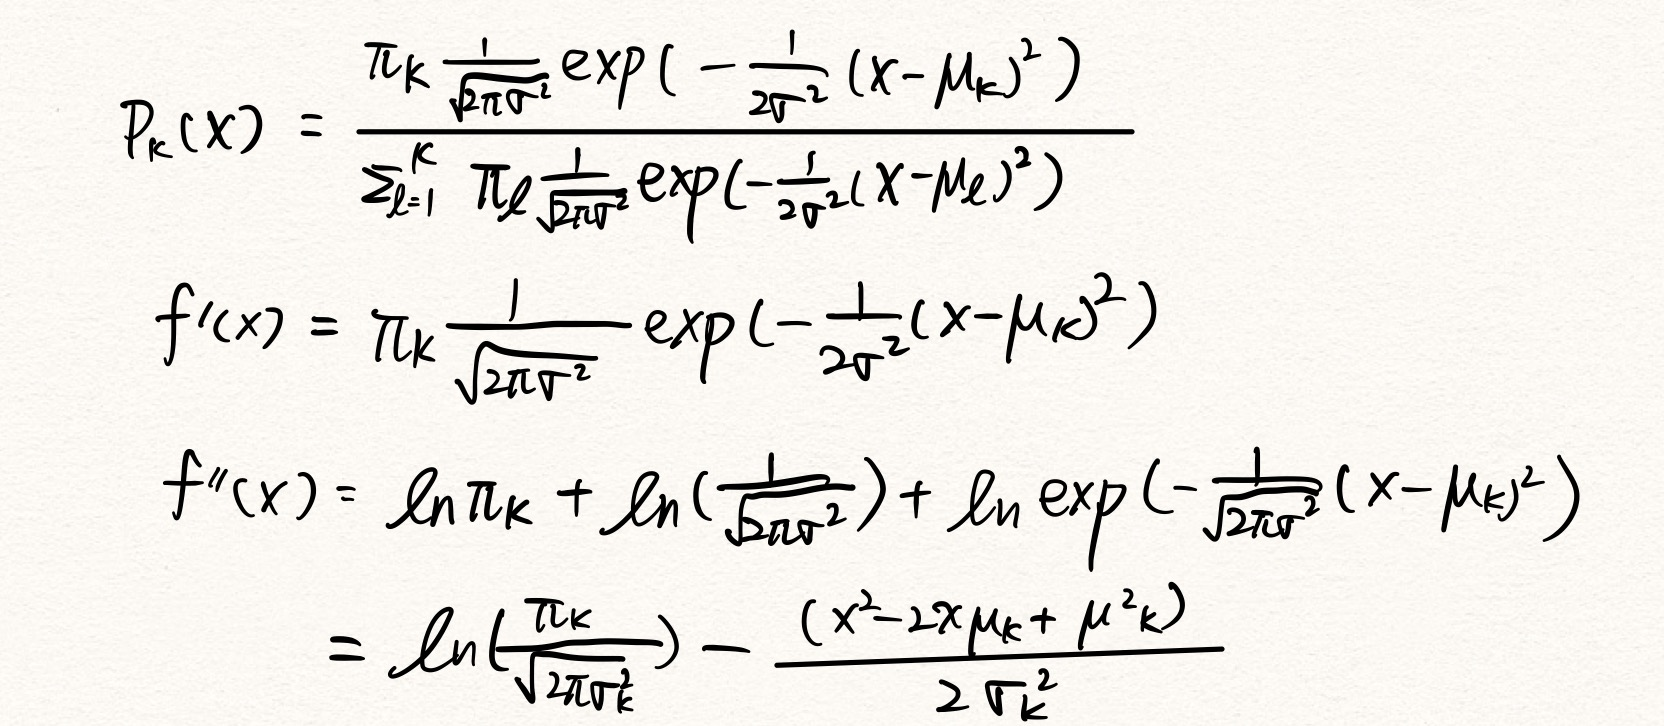

## ISLR, 4.8.7

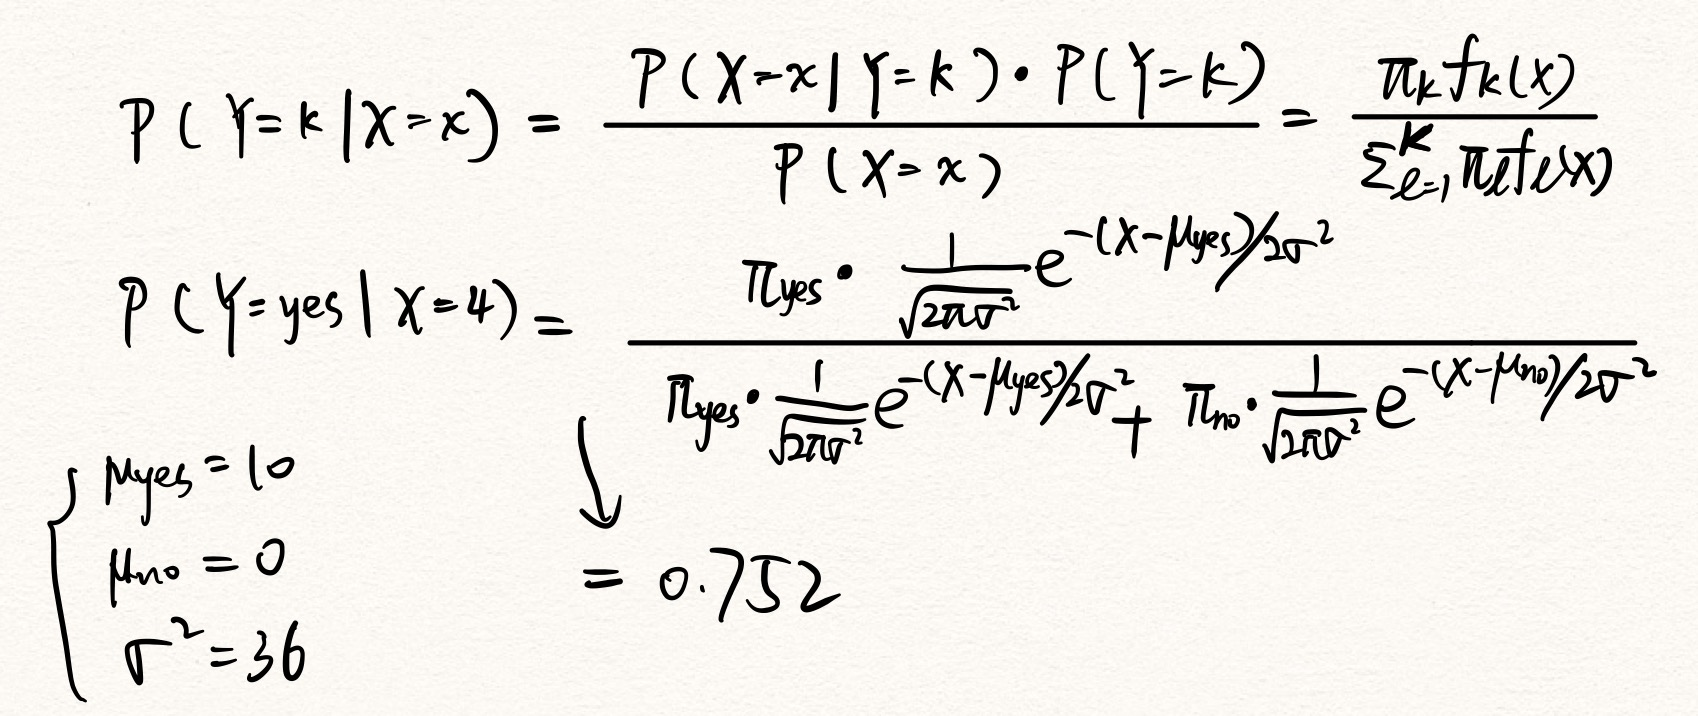

---